In [ ]:
import pandas as pd
import numpy as np

Mouting google drive for importing the datasets,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/train.csv")

Starting with Data Cleaning,

In [ ]:
data.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [ ]:
data.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [ ]:
data.isna().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [ ]:
len(data.columns)

20

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            144844 non-null  object 
 1   order_id              144844 non-null  int64  
 2   order_date            144844 non-null  object 
 3   allot_time            144844 non-null  object 
 4   accept_time           144776 non-null  object 
 5   rider_id              144844 non-null  int64  
 6   first_mile_distance   144844 non-null  float64
 7   last_mile_distance    144844 non-null  float64
 8   alloted_orders        140071 non-null  float64
 9   delivered_orders      139960 non-null  float64
 10  undelivered_orders    139960 non-null  float64
 11  lifetime_order_count  144066 non-null  float64
 12  reassignment_method   4632 non-null    object 
 13  reassignment_reason   4635 non-null    object 
 14  reassigned_order      4635 non-null    float64
 15  

In [ ]:
test.isna().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                 68
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders            4773
delivered_orders          4884
undelivered_orders        4884
lifetime_order_count       778
reassignment_method     140212
reassignment_reason     140209
reassigned_order        140209
session_time              5054
dtype: int64

Viewing the correlation matrix,

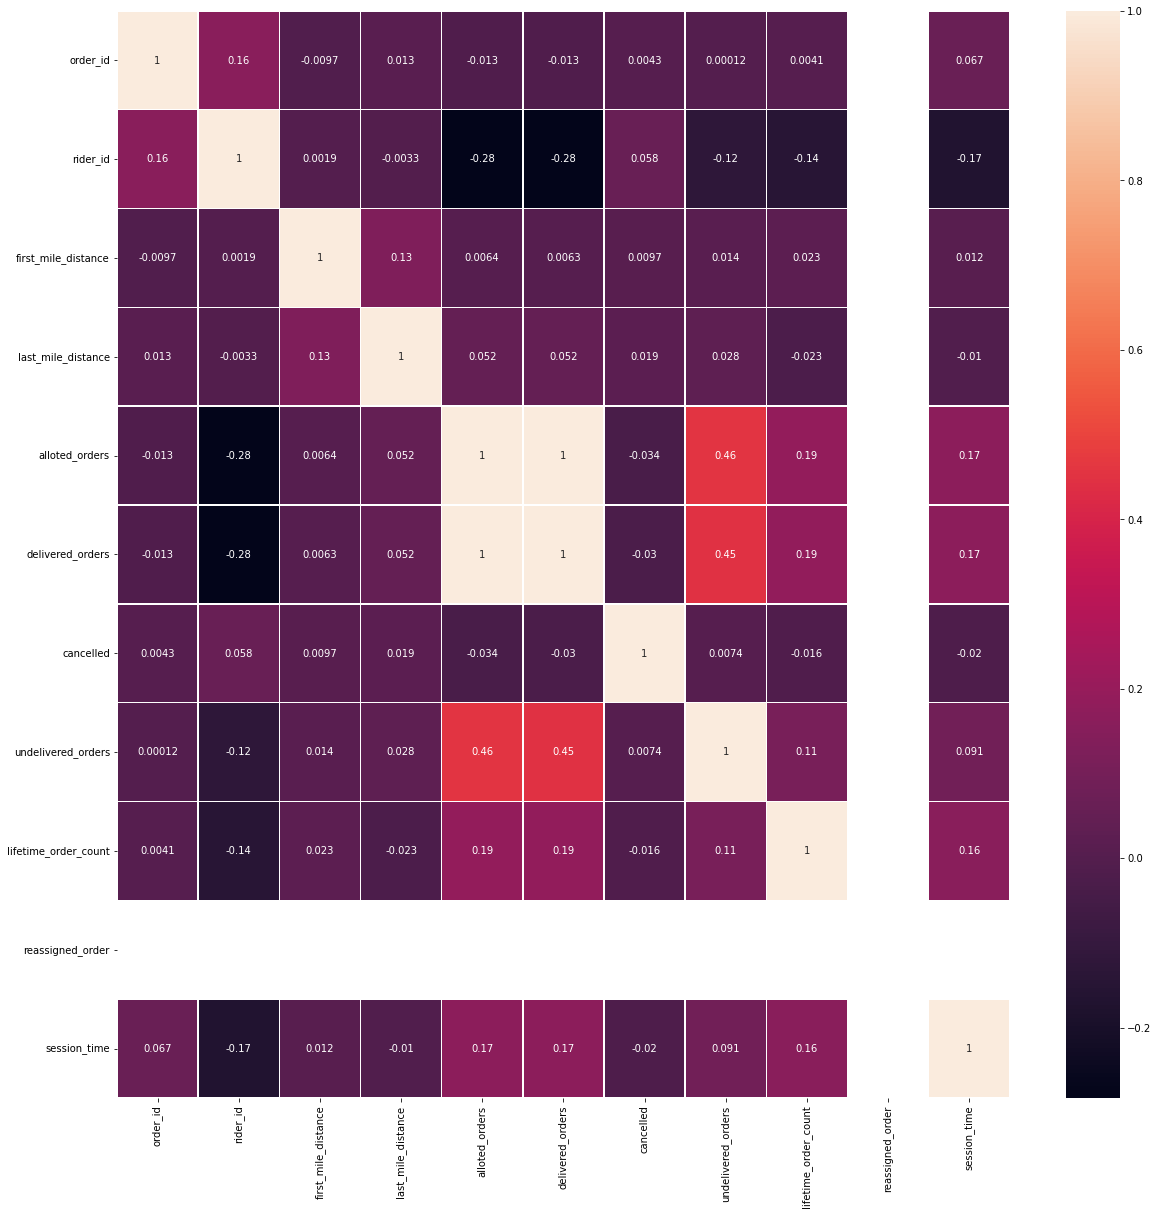

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
ax = sns.heatmap(data.corr().iloc[:,:], annot=True, linewidths=.5)

Dropping columns with too many NaN values,

In [ ]:
.cols = ['reassignment_reason', 'reassignment_method', 'reassigned_order']

In [ ]:
data = data.drop(cols,axis=1)

In [ ]:
test = test.drop(cols,axis=1)

In [ ]:
data = data.drop('cancelled_time',axis=1)

In [ ]:
print(set(data.columns) - set(test.columns))

{'alloted_orders', 'lifetime_order_count', 'day_of_week', 'acc_all_diff', 'delivered_orders', 'acc_ord_diff', 'undelivered_orders', 'hour', 'cancelled', 'session_time', 'session'}


In [ ]:
data = data.drop('pickup_time',axis=1)
data = data.drop('delivered_time',axis=1)

After dropping,

In [ ]:
data.isna().sum()

order_time                  0
order_id                    0
order_date                  0
allot_time                  0
accept_time               157
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16948
delivered_orders        17341
cancelled                   0
undelivered_orders      17341
lifetime_order_count       53
session_time             3675
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   rider_id              450000 non-null  int64  
 6   first_mile_distance   450000 non-null  float64
 7   last_mile_distance    450000 non-null  float64
 8   alloted_orders        433052 non-null  float64
 9   delivered_orders      432659 non-null  float64
 10  cancelled             450000 non-null  int64  
 11  undelivered_orders    432659 non-null  float64
 12  lifetime_order_count  449947 non-null  float64
 13  session_time          446325 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 48.

Checking correlation again,

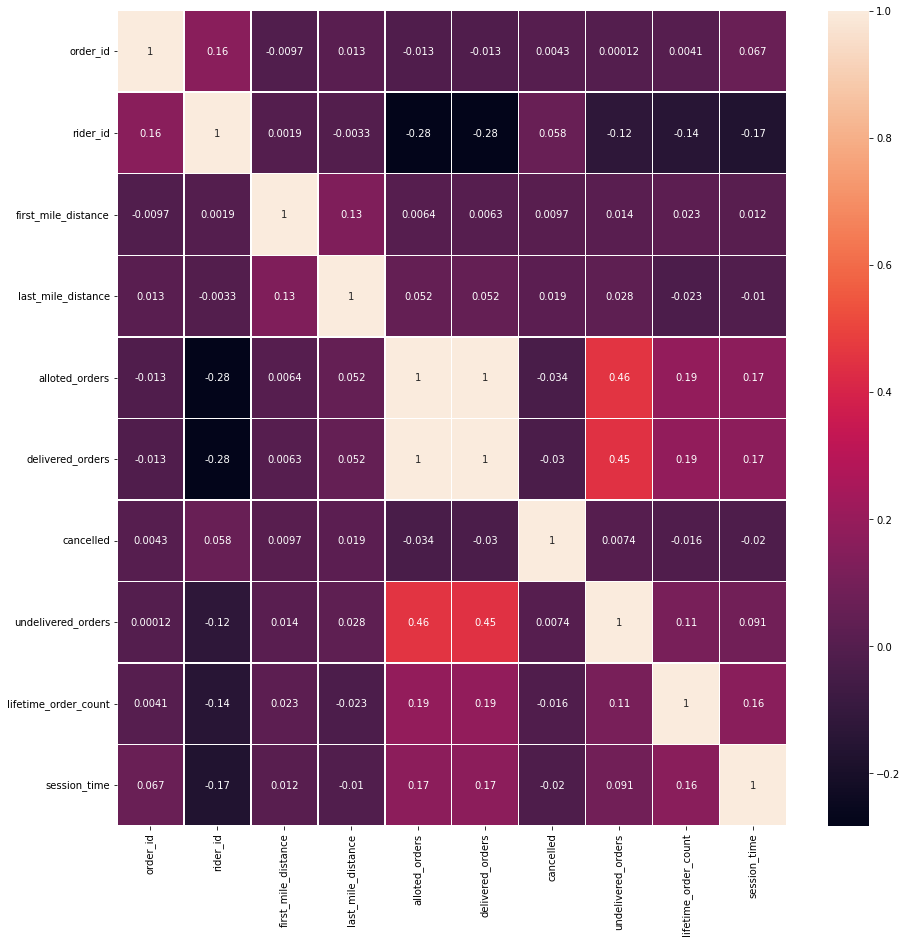

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
ax = sns.heatmap(data.corr().iloc[:,:], annot=True, linewidths=.5)

Dividing the features (for finding missing),

In [ ]:
numerical = ['alloted_orders','delivered_orders','undelivered_orders','lifetime_order_count','session_time']
fdate = ['accept_time']

Since it's difficult to predict time, we drop all rows where accept time is missing,

In [ ]:
data = data[pd.notnull(data['accept_time'])]

In [ ]:
data.isna().sum()

order_time                  0
order_id                    0
order_date                  0
allot_time                  0
accept_time                 0
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16932
delivered_orders        17323
cancelled                   0
undelivered_orders      17323
lifetime_order_count       50
session_time             3672
dtype: int64

In [ ]:
data.shape

(449843, 14)

In [ ]:
# for rider in test['rider_id']:
#   if rider in v1['rider_id'].values:
#     test1['cancelled'] = list(v1[(v1['rider_id'] == rider)]['cancelled'].values)[0]
#   else:
#     test1['cancelled'] = 0

In [ ]:
data.head(10)

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.566600,2.65,46.0,46.0,0,0.0,621.0,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.520700,2.76,8.0,8.0,0,0.0,105.0,3.266667
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.207400,4.80,1.0,1.0,0,0.0,66.0,9.816667
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.189400,6.38,1.0,1.0,0,0.0,127.0,17.533333
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.787000,4.01,34.0,34.0,0,0.0,84.0,1.350000
5,2021-01-26 03:07:16,556758,2021-01-26 00:00:00,2021-01-26 03:12:14,2021-01-26 03:12:27,1469,2.481800,5.18,296.0,294.0,0,2.0,1506.0,NaN
6,2021-01-26 03:10:50,556759,2021-01-26 00:00:00,2021-01-26 03:11:18,2021-01-26 03:12:05,8851,2.809100,3.40,45.0,45.0,0,0.0,1460.0,NaN
7,2021-01-26 03:14:10,556760,2021-01-26 00:00:00,2021-01-26 03:14:38,2021-01-26 03:14:44,8493,0.025681,0.16,54.0,53.0,0,1.0,270.0,44.166667
8,2021-01-26 03:14:20,556761,2021-01-26 00:00:00,2021-01-26 03:14:50,2021-01-26 03:15:14,11543,2.444200,2.86,29.0,29.0,0,0.0,955.0,2.500000
9,2021-01-26 03:15:18,556762,2021-01-26 00:00:00,2021-01-26 03:21:27,2021-01-26 03:22:04,21037,2.878600,2.61,NaN,NaN,0,NaN,1.0,NaN


In [ ]:
data['order_time'] = pd.to_datetime(data['order_time'])

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [ ]:
data['allot_time'] = pd.to_datetime(data['allot_time'])

In [ ]:
data['accept_time'] = pd.to_datetime(data['accept_time'])

In [ ]:
data['acc_all_diff'] = data['accept_time'] - data['allot_time']
data['acc_ord_diff'] = data['accept_time'] - data['order_time']

In [ ]:
data['hour'] = data['order_time'].dt.hour

In [ ]:
data['acc_all_diff'] = data['acc_all_diff']/np.timedelta64(1,'s')
data['acc_ord_diff'] = data['acc_ord_diff']/np.timedelta64(1,'s')

In [ ]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
data['session'] = pd.cut(data['hour'], bins=b, labels=l, include_lowest=True)

In [ ]:
data.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,acc_all_diff,acc_ord_diff,hour,session
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,9.0,33.0,2,Late Night
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,48.0,89.0,2,Late Night
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,16.0,24.0,2,Late Night
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,41.0,73.0,2,Late Night
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,36.0,87.0,3,Late Night


In [ ]:
data['day_of_week'] = data['order_date'].dt.dayofweek

In [ ]:
cols = list(data.columns)
cols

['order_time',
 'order_id',
 'order_date',
 'allot_time',
 'accept_time',
 'rider_id',
 'first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'cancelled',
 'undelivered_orders',
 'lifetime_order_count',
 'session_time',
 'acc_all_diff',
 'acc_ord_diff',
 'hour',
 'session',
 'day_of_week']

Rearranging columns, removing allot_time, accept_time, and hours

In [ ]:
cols = [ 
 'order_id',
 'acc_all_diff',
 'acc_ord_diff',
 'hour',
 'session',
 'day_of_week',
 'rider_id',
 'first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'undelivered_orders',
 'lifetime_order_count',
 'session_time',
 'cancelled',
]

In [ ]:
data = data[cols]

In [ ]:
data.head(2)

,order_id,acc_all_diff,acc_ord_diff,hour,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,cancelled
0,556753,9.0,33.0,2,Late Night,1,11696,1.5666,2.65,46.0,46.0,0.0,621.0,NaN,0
1,556754,48.0,89.0,2,Late Night,1,18117,2.5207,2.76,8.0,8.0,0.0,105.0,3.266667,0


In [ ]:
data.isna().sum()

order_id                    0
acc_all_diff                0
acc_ord_diff                0
hour                        0
session                     0
day_of_week                 0
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16932
delivered_orders        17323
undelivered_orders      17323
lifetime_order_count       50
session_time             3672
cancelled                   0
dtype: int64

In [ ]:
data.shape

(449843, 15)

In [ ]:
data['session'],_ = pd.factorize(data['session'])

From the EDA, we see two things
1.   The highest number of cancellations occur on Saturday (or is it just Jan 30?) -  we can have two approaches here; either consider it to be weekend or day basis
2.   Data for the next Saturday ends abruptly at morning 10.00 hours, so should we drop the last day in the dataset?

Trying some visualization techniques,

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Handling missing values before that,

In [ ]:
from sklearn.impute import KNNImputer

Scaling the data using MinMaxScaler,

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data.head()

,order_id,acc_all_diff,acc_ord_diff,hour,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,cancelled
0,0.920064,0.968742,0.001988,0.095238,0.0,0.166667,0.542335,0.037263,0.118251,0.079505,0.080214,0.0,0.020381,NaN,0.0
1,0.920066,0.970065,0.005578,0.095238,0.0,0.166667,0.840072,0.059959,0.123159,0.012367,0.012478,0.0,0.003446,0.002515,0.0
2,0.920068,0.968979,0.001411,0.095238,0.0,0.166667,0.863535,0.052506,0.214190,0.000000,0.000000,0.0,0.002166,0.007557,0.0
3,0.920070,0.969828,0.004552,0.095238,0.0,0.166667,0.739358,0.052078,0.284694,0.000000,0.000000,0.0,0.004168,0.013498,0.0
4,0.920072,0.969658,0.005450,0.142857,0.0,0.166667,0.815589,0.066294,0.178938,0.058304,0.058824,0.0,0.002757,0.001039,0.0


Implementing KNN Imputer for filling missing values,

In [ ]:
# imputer = KNNImputer(n_neighbors=10)
# data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [ ]:
data.isna().sum()

order_id                    0
acc_all_diff                0
acc_ord_diff                0
hour                        0
session                     0
day_of_week                 0
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16932
delivered_orders        17323
undelivered_orders      17323
lifetime_order_count       50
session_time             3672
cancelled                   0
dtype: int64

In [ ]:
data1 = data.copy()

Trying random imputation,

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
for feature in numerical:
    data1[feature + '_imp'] = data1[feature]
    data1 = random_imputation(data1, feature)

In [ ]:
from sklearn import linear_model

Deterministic Regression Imputation,

In [ ]:
# deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

# for feature in missing_columns:
        
#     deter_data["Det" + feature] = df[feature + "_imp"]
#     parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
#     #Create a Linear Regression model to estimate the missing data
#     model = linear_model.LinearRegression()
#     model.fit(X = df[parameters], y = df[feature + '_imp'])
    
#     #observe that I preserve the index of the missing data from the original dataframe
#     deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

Stochastic Regression Imputation,

In [ ]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in numerical])

for feature in numerical:
        
    random_data["Ran" + feature] = data1[feature + '_imp']
    parameters = list(set(data1.columns) - set(numerical) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = data1[parameters], y = data1[feature + '_imp'])
    
    # #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    # predict = model.predict(data1[parameters])
    # std_error = (predict[data1[feature].notnull()] - data1.loc[data1[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    # random_predict = np.random.normal(size = data1[feature].shape[0], 
    #                                   loc = predict, 
    #                                   scale = std_error)
    # random_data.loc[(data1[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(data1[feature].isnull()) & 
    #                                                                         (random_predict > 0)]
    random_data.loc[data1[feature].isnull(), "Ran" + feature] = model.predict(data1[parameters])[data1[feature].isnull()]

In [ ]:
random_data.isna().sum()

Ranalloted_orders          0
Randelivered_orders        0
Ranundelivered_orders      0
Ranlifetime_order_count    0
Ransession_time            0
dtype: int64

In [ ]:
random_data.head(2)

,Ranalloted_orders,Randelivered_orders,Ranundelivered_orders,Ranlifetime_order_count,Ransession_time
0,0.079505,0.080214,0.0,0.020381,-0.018344
1,0.012367,0.012478,0.0,0.003446,0.002515


In [ ]:
random_data['Ranalotted_orders'] = -1
random_data['Randelivered_orders'] = -1
random_data['Ranundelivered_orders'] = -1
random_data['Ranlifetime_order_count'] = -1
random_data['Ransession_time'] = -1

In [ ]:
random_data['order_id'] = data['order_id']

In [ ]:
# random_data.loc[random_data['Ranseconds_diff'] < 0, 'Ranseconds_diff'] = 0

In [ ]:
data.loc[data.order_id.isin(random_data.order_id), ['lifetime_order_count','alloted_orders','delivered_orders','undelivered_orders','session_time']] = random_data[['Ranlifetime_order_count','Ranalloted_orders','Randelivered_orders','Ranundelivered_orders','Ransession_time']].values

In [ ]:
data.isna().sum()

order_id                0
acc_all_diff            0
acc_ord_diff            0
hour                    0
session                 0
day_of_week             0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
undelivered_orders      0
lifetime_order_count    0
session_time            0
cancelled               0
dtype: int64

In [ ]:
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
data['acc_ord_diff'].min()

0.0

In [ ]:
data.lifetime_order_count = data.lifetime_order_count.round()
data.delivered_orders = data.delivered_orders.round()
data.undelivered_orders = data.undelivered_orders.round()
data.alloted_orders = data.alloted_orders.round()

Visualization (Forming clusters to understand class distrubution),

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = data.drop('cancelled', axis=1)
y = data['cancelled']

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

PCA took 3.0 s
Truncated SVD took 3.4 s


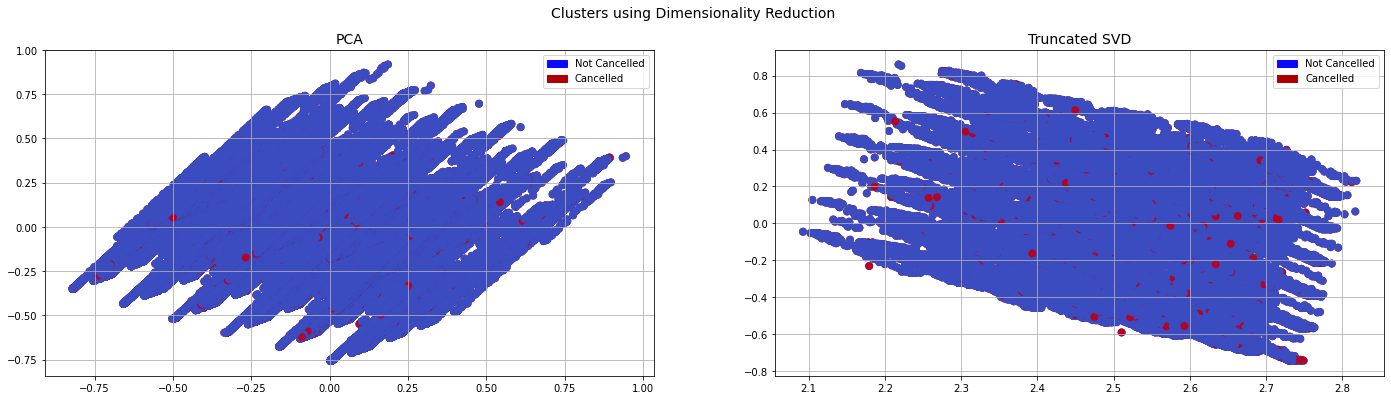

In [ ]:
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Cancelled')
red_patch = mpatches.Patch(color='#AF0000', label='Cancelled')

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not Cancelled', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Cancelled', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Not Cancelled', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Cancelled', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Trying to Oversample the data using various implementations of SMOTE

So far best performance has been,
1.    Borderline SMOTE
2.    ADASYN
3.    SMOTE + TOMEK
4.    SMOTE
5.    SMOTE + ENN

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.head()

,order_id,acc_all_diff,acc_ord_diff,hour,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,cancelled
0,0.920064,0.968742,0.001988,0.095238,0.0,0.166667,0.542335,0.037263,0.118251,0.0,-1.0,-1.0,-1.0,-1.0,0.0
1,0.920066,0.970065,0.005578,0.095238,0.0,0.166667,0.840072,0.059959,0.123159,0.0,-1.0,-1.0,-1.0,-1.0,0.0
2,0.920068,0.968979,0.001411,0.095238,0.0,0.166667,0.863535,0.052506,0.214190,0.0,-1.0,-1.0,-1.0,-1.0,0.0
3,0.920070,0.969828,0.004552,0.095238,0.0,0.166667,0.739358,0.052078,0.284694,0.0,-1.0,-1.0,-1.0,-1.0,0.0
4,0.920072,0.969658,0.005450,0.142857,0.0,0.166667,0.815589,0.066294,0.178938,0.0,-1.0,-1.0,-1.0,-1.0,0.0


In [ ]:
# from sklearn.model_selection import train_test_split 
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier

Detecting outliers,

In [ ]:
from collections import Counter

def detect_outliers(train_data,n,features):
    
    outlier_indices = []
    for col in features:
        upper_limit=data[col].mean()+3.88*data[col].std()
        lower_limit=data[col].mean()-2.88*data[col].std()
        outlier_list_col = train_data[(train_data[col] < lower_limit) | (train_data[col] > upper_limit )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

list_atributes = data.columns
Outliers_to_drop = detect_outliers(data,2,list_atributes)

In [ ]:
len(Outliers_to_drop)

42

In [ ]:
from collections import Counter

def detect_outliers(train_data,n,features):
    
    outlier_indices = []
    for col in features:
        upper_limit=data[col].mean()+3*data[col].std()
        lower_limit=data[col].mean()-3*data[col].std()
        outlier_list_col = train_data[(train_data[col] < lower_limit) | (train_data[col] > upper_limit )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

list_atributes = data.columns
Outliers_to_drop2 = detect_outliers(data,2,list_atributes)

In [ ]:
tgindex=[]
for i in Outliers_to_drop2:
  if(data.iloc[i]['cancelled']==0):
    tgindex.append(i)

In [ ]:
print(len(tgindex))

39


In [ ]:
# finaldrop= list(set(tgindex))

In [ ]:
finaldrop= list(set(Outliers_to_drop))

In [ ]:
data.shape

(449843, 15)

In [ ]:
data.drop(data.index[finaldrop], inplace=True)

In [ ]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [ ]:
X.shape

(449801, 14)

Train test split, (with stratify)

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle = True,stratify=y)

Trying SMOTE,

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Trying ADASYN,

In [ ]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state = 101)
# X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [ ]:
# X.shape

Trying Borderline SMOTE,

In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE
# bsmote = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
# X_train, y_train = bsmote.fit_resample(X_train, y_train)

Trying SMOTE + tomek links,

In [ ]:
# from imblearn.combine import SMOTETomek 

# smt = SMOTETomek(random_state=42)
#X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
# X.shape

In [ ]:
# y.value_counts()

Trying SMOTE + ENN,

In [ ]:
# from imblearn.combine import SMOTEENN 

# sme = SMOTEENN(random_state=101)
# X_train, y_train = sme.fit_resample(X_train, y_train)

In [ ]:
y_train.shape

(622680,)

In [ ]:
y_train.value_counts()

0.0    311340
1.0    311340
Name: cancelled, dtype: int64

In [ ]:
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# models = []
# models.append(('NaiveBayes', GaussianNB()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('GradientBoosting', GradientBoostingClassifier()))
# models.append(('XGB',XGBClassifier()))
# models.append(('LGB',lgb.LGBMClassifier()))
# models.append(("Adaboost",AdaBoostClassifier()))

In [ ]:
X_train.shape

(622680, 14)

Using ExtraTreesClassifier to rank the features in terms of importance,

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier

# TOP_FEATURES = 6

# forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
# forest.fit(X_train, y_train)

# importances = forest.feature_importances_
# std = np.std(
#     [tree.feature_importances_ for tree in forest.estimators_],
#     axis=0
# )
# indices = np.argsort(importances)[::-1]
# indices = indices[:TOP_FEATURES]

# # importances[indices] = normalize(importances[indices])

# print('Top features:')
# for f in range(TOP_FEATURES):
#     print('%d %f' % (indices[f], importances[indices[f]]))

In [ ]:
# X_train = tX_train
# X_test = tX_test

In [ ]:
# indices = np.append(0, indices)
# fX = X_train.iloc[:, indices]
# X_train = fX

In [ ]:
# fX = X_test.iloc[:, indices]
# X_test = fX

Plotting the ROC-AUC,

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

Naive Bayes,

In [ ]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
# predict probabilities
lr_probs = NaiveBayes.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

0.5


In [ ]:
#My Model
print(lr_auc)

0.6861030417014272


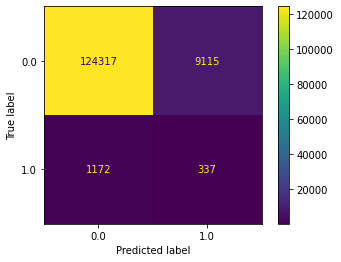

In [ ]:
metrics.plot_confusion_matrix(NaiveBayes,X_test,y_test,values_format = 'd')

LDA,

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
# predict probabilities
lr_probs = LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

0.5


In [ ]:
#My Model
print(lr_auc)

0.701737101225014


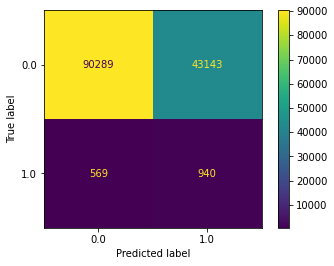

In [ ]:
metrics.plot_confusion_matrix(LDA,X_test,y_test,values_format = 'd')

Light GBM,

In [ ]:
import lightgbm as lgb
lgbclf = lgb.LGBMClassifier(random_state=42,objective ='binary')

In [ ]:
lgbclf.fit(X_train, y_train)

LGBMClassifier(objective='binary', random_state=42)

In [ ]:
# predict probabilities
lr_probs = lgbclf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

0.5


In [ ]:
#My Model
print(lr_auc)

0.6939832491153366


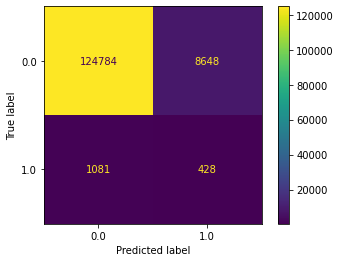

In [ ]:
metrics.plot_confusion_matrix(lgbclf,X_test,y_test,values_format = 'd')

Logistic Regression,

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [ ]:
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

0.5


In [ ]:
#My Model
print(lr_auc)

0.7061159036547547


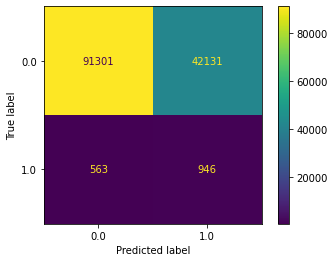

In [ ]:
metrics.plot_confusion_matrix(clf,X_test,y_test,values_format = 'd')

XGBoost,

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
# predict probabilities
lr_probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

0.5


In [ ]:
#My Model
print(lr_auc)

0.6862370255553634


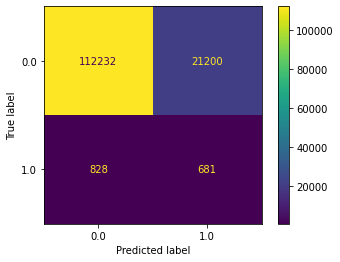

In [ ]:
metrics.plot_confusion_matrix(xgb,X_test,y_test,values_format = 'd')

KNN,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# predict probabilities
lr_probs = knnmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

0.5


In [ ]:
#My Model
print(lr_auc)

0.5810945079567562


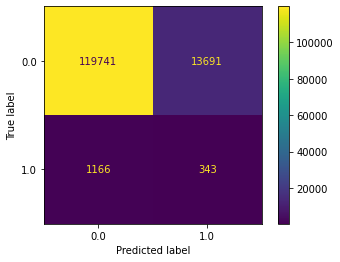

In [ ]:
metrics.plot_confusion_matrix(knnmodel,X_test,y_test,values_format = 'd')

Trying ensemble technique - Voting Classifier,

In [ ]:
from sklearn.ensemble import VotingClassifier

On comparison of hard voting classifier, and soft voting classifier it was observered that soft voting classifier performed better

In [ ]:
# eclf = VotingClassifier(estimators=[('xgb',xgb),('lgbm', lgbclf), ('log', clf), ('lda',LDA)], voting='soft', weights = [1,1,1.25,1.25]) 73.5

In [ ]:
# eclf = VotingClassifier(estimators=[('lgbm', lgbclf), ('log', clf))], voting='soft', weights = [1,2]) 74

In [ ]:
# eclf = VotingClassifier(estimators=[('xgb',xgb),('lgbm', lgbclf), ('log', clf), ('lda',LDA)], voting='soft', weights = [2,2,3,2]) 74.5

In [ ]:
eclf = VotingClassifier(estimators=[('nb',NaiveBayes),('lgbm', lgbclf), ('log', clf), ('lda',LDA)], voting='soft', weights = [1,3,2,2])

In [ ]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('lgbm',
                              LGBMClassifier(objective='binary',
                                             random_state=42)),
                             ('log', LogisticRegression(random_state=42)),
                             ('lda', LinearDiscriminantAnalysis())],
                 voting='soft', weights=[1, 3, 2, 2])

In [ ]:
# predict probabilities
lr_probs = eclf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
#No Skill
print(ns_auc)

0.5


In [ ]:
#My Model
print(lr_auc)

0.7166877077563001


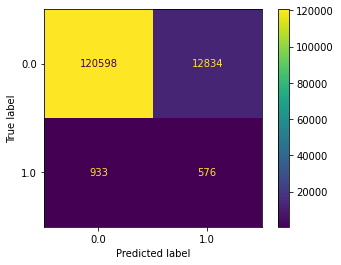

In [ ]:
metrics.plot_confusion_matrix(eclf,X_test,y_test,values_format = 'd')

Cross validation scores,

In [ ]:
# results = []
# names = []

# for name, model in models:
        
#         cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= "accuracy")
#         results.append(cv_results)
#         names.append(name)
#         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#         print(msg)

Reviewing the Clusters,

In [ ]:
# New_df is from the random undersample data (fewer instances)
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

PCA took 1.5 s
Truncated SVD took 1.8 s


In [ ]:
# f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# # labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Cancelled')
# red_patch = mpatches.Patch(color='#AF0000', label='Cancelled')

# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not Cancelled', linewidths=2)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Cancelled', linewidths=2)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[blue_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Not Cancelled', linewidths=2)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Cancelled', linewidths=2)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[blue_patch, red_patch])

# plt.show()

Working with test data,

Changing testing data,

In [ ]:
test.isna().sum()

order_time                 0
order_id                   0
order_date                 0
allot_time                 0
accept_time               68
rider_id                   0
first_mile_distance        0
last_mile_distance         0
alloted_orders          4773
delivered_orders        4884
undelivered_orders      4884
lifetime_order_count     778
session_time            5054
dtype: int64

In [ ]:
# test = test[pd.notnull(test['accept_time'])]

In [ ]:
test['order_time'] = pd.to_datetime(test['order_time'])

In [ ]:
test['order_date'] = pd.to_datetime(test['order_date'])

In [ ]:
test['allot_time'] = pd.to_datetime(test['allot_time'])

In [ ]:
test['accept_time'] = pd.to_datetime(test['accept_time'])

In [ ]:
test['acc_all_diff'] = test['accept_time'] - test['allot_time']
test['acc_ord_diff'] = test['accept_time'] - test['order_time']

In [ ]:
test['hour'] = test['order_time'].dt.hour

In [ ]:
test['acc_all_diff'] = test['acc_all_diff']/np.timedelta64(1,'s')
test['acc_ord_diff'] = test['acc_ord_diff']/np.timedelta64(1,'s')

In [ ]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
test['session'] = pd.cut(test['hour'], bins=b, labels=l, include_lowest=True)

In [ ]:
test.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,acc_all_diff,acc_ord_diff,hour,session
0,2021-02-06 10:03:24,130231,2021-02-06,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,273.400000,26.0,51.0,10,Morning
1,2021-02-06 10:03:26,130232,2021-02-06,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,252.100000,9.0,10.0,10,Morning
2,2021-02-06 10:03:27,130233,2021-02-06,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,241.383333,80.0,127.0,10,Morning
3,2021-02-06 10:03:29,130234,2021-02-06,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,291.933333,23.0,24.0,10,Morning
4,2021-02-06 10:03:35,130235,2021-02-06,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,247.133333,60.0,68.0,10,Morning


In [ ]:
test['day_of_week'] = test['order_date'].dt.dayofweek

In [ ]:
cols = list(test.columns)
cols

['order_time',
 'order_id',
 'order_date',
 'allot_time',
 'accept_time',
 'rider_id',
 'first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'undelivered_orders',
 'lifetime_order_count',
 'session_time',
 'acc_all_diff',
 'acc_ord_diff',
 'hour',
 'session',
 'day_of_week']

Rearranging columns, removing allot_time, accept_time, and hours

In [ ]:
cols = [ 
 'order_id',
 'acc_all_diff',
 'acc_ord_diff',
 'hour',
 'session',
 'day_of_week',
 'rider_id',
 'first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'undelivered_orders',
 'lifetime_order_count',
 'session_time',
]

In [ ]:
test = test[cols]

In [ ]:
test.head(2)

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,reassignment_method,reassignment_reason,reassigned_order,acc_all_diff,acc_ord_diff,hour,session,day_of_week
0,2021-02-06 10:03:24,130231,2021-02-06,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,NaN,NaN,NaN,26.0,51.0,10,Morning,5
1,2021-02-06 10:03:26,130232,2021-02-06,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,NaN,NaN,NaN,9.0,10.0,10,Morning,5


In [ ]:
test.isna().sum()

order_id                   0
acc_all_diff              68
acc_ord_diff              68
hour                       0
session                    0
day_of_week                0
rider_id                   0
first_mile_distance        0
last_mile_distance         0
alloted_orders          4773
delivered_orders        4884
undelivered_orders      4884
lifetime_order_count     778
session_time            5054
dtype: int64

In [ ]:
test['acc_all_diff'] = test['acc_all_diff'].fillna(0)
test['acc_ord_diff'] = test['acc_ord_diff'].fillna(0)

In [ ]:
test['session'],_ = pd.factorize(test['session'])

In [ ]:
test = test[cols]

In [ ]:
test2 = test[cols]

In [ ]:
print(set(test.columns)-set(X.columns))

set()


In [ ]:
# test = test.reindex(columns=test.columns)
# X = X.reindex(columns=X.columns)

In [ ]:
test2 = pd.concat([X, test[cols]], ignore_index=True)

In [ ]:
test2.isna().sum()

order_id                   0
acc_all_diff               0
acc_ord_diff               0
hour                       0
session                    0
day_of_week                0
rider_id                   0
first_mile_distance        0
last_mile_distance         0
alloted_orders          4773
delivered_orders        4884
undelivered_orders      4884
lifetime_order_count     778
session_time            5054
dtype: int64

In [ ]:
test2.shape

(594645, 19)

In [ ]:
cols = ['lifetime_order_count','alloted_orders','delivered_orders','undelivered_orders','session_time']

Random imputation,

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
for feature in cols:
    test2[feature + '_imp'] = test2[feature]
    test2 = random_imputation(test2, feature)

In [ ]:
from sklearn import linear_model

Stochastic Regression Imputation,

In [ ]:
random_test = pd.DataFrame(columns = ["Ran" + name for name in cols])

for feature in cols:
        
    random_test["Ran" + feature] = test2[feature + '_imp']
    parameters = list(set(test2.columns) - set(cols) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = test2[parameters], y = test2[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(test2[parameters])
    std_error = (predict[test2[feature].notnull()] - test2.loc[test2[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = test2[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_test.loc[(test2[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(test2[feature].isnull()) & 
                                                                            (random_predict > 0)]

In [ ]:
random_test = random_test.iloc[449801:,:]

In [ ]:
random_test['order_id'] = test2.loc[X.shape[0]:,'order_id'] 

In [ ]:
random_test['order_id'] = random_test['order_id'].astype(np.int64)

In [ ]:
random_test.shape

(144844, 6)

In [ ]:
random_test['order_id'] = test['order_id'].values

In [ ]:
# test['order_id']

0         130231
1         130232
2         130233
3         130234
4         130235
           ...  
144839     41184
144840     41185
144841     41186
144842     41187
144843     41188
Name: order_id, Length: 144844, dtype: int64

In [ ]:
random_test.head()

,Ranlifetime_order_count,Ranalloted_orders,Randelivered_orders,Ranundelivered_orders,Ransession_time,order_id
449801,747.0,216.0,215.0,1.0,273.400000,130231
449802,75.0,52.0,52.0,0.0,252.100000,130232
449803,2214.0,289.0,289.0,0.0,241.383333,130233
449804,1020.0,125.0,122.0,3.0,291.933333,130234
449805,7284.0,352.0,350.0,2.0,247.133333,130235


In [ ]:
X.shape

(449801, 12)

In [ ]:
random_test.isna().sum()

Ranlifetime_order_count    0
Ranalloted_orders          0
Randelivered_orders        0
Ranundelivered_orders      0
Ransession_time            0
order_id                   0
dtype: int64

In [ ]:
test.isna().sum()

order_id                0
acc_all_diff            0
acc_ord_diff            0
session                 0
day_of_week             0
rider_id                0
first_mile_distance     0
last_mile_distance      0
delivered_orders        0
undelivered_orders      0
lifetime_order_count    0
session_time            0
dtype: int64

In [ ]:
test = test.replace(np.nan, 0)

In [ ]:
# random_test.loc[random_data['Ranseconds_diff'] <= 0, 'Ranseconds_diff'] = 0

In [ ]:
test.loc[test.order_id.isin(random_test.order_id), ['lifetime_order_count','alloted_orders','delivered_orders','undelivered_orders','session_time']] = random_test[['Ranlifetime_order_count','Ranalloted_orders','Randelivered_orders','Ranundelivered_orders','Ransession_time']].values

Validation,

In [ ]:
data.head()

,order_id,acc_all_diff,acc_ord_diff,hour,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,cancelled
0,0.920064,0.968742,0.001988,0.095238,0.0,0.166667,0.542335,0.037263,0.118251,0.0,-1.0,-1.0,-1.0,-1.0,0.0
1,0.920066,0.970065,0.005578,0.095238,0.0,0.166667,0.840072,0.059959,0.123159,0.0,-1.0,-1.0,-1.0,-1.0,0.0
2,0.920068,0.968979,0.001411,0.095238,0.0,0.166667,0.863535,0.052506,0.214190,0.0,-1.0,-1.0,-1.0,-1.0,0.0
3,0.920070,0.969828,0.004552,0.095238,0.0,0.166667,0.739358,0.052078,0.284694,0.0,-1.0,-1.0,-1.0,-1.0,0.0
4,0.920072,0.969658,0.005450,0.142857,0.0,0.166667,0.815589,0.066294,0.178938,0.0,-1.0,-1.0,-1.0,-1.0,0.0


In [ ]:
X.shape

(449801, 12)

In [ ]:
y.shape

(449801,)

In [ ]:
test.shape

(144844, 14)

In [ ]:
test['session'],_ = pd.factorize(test['session'])

In [ ]:
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# models = []
# models.append(('NaiveBayes', GaussianNB()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('GradientBoosting', GradientBoostingClassifier()))
# models.append(('XGB',XGBClassifier()))
# models.append(('LGB',lgb.LGBMClassifier()))
# models.append(("Adaboost",AdaBoostClassifier()))

Will drop extreme outliers (Later),

Standard Scaler,

In [ ]:
# X = X.drop('hour',axis=1)
# X = X.drop('alloted_orders',axis=1)

test = test.drop('hour',axis=1)
test = test.drop('alloted_orders',axis=1)

Correlation,

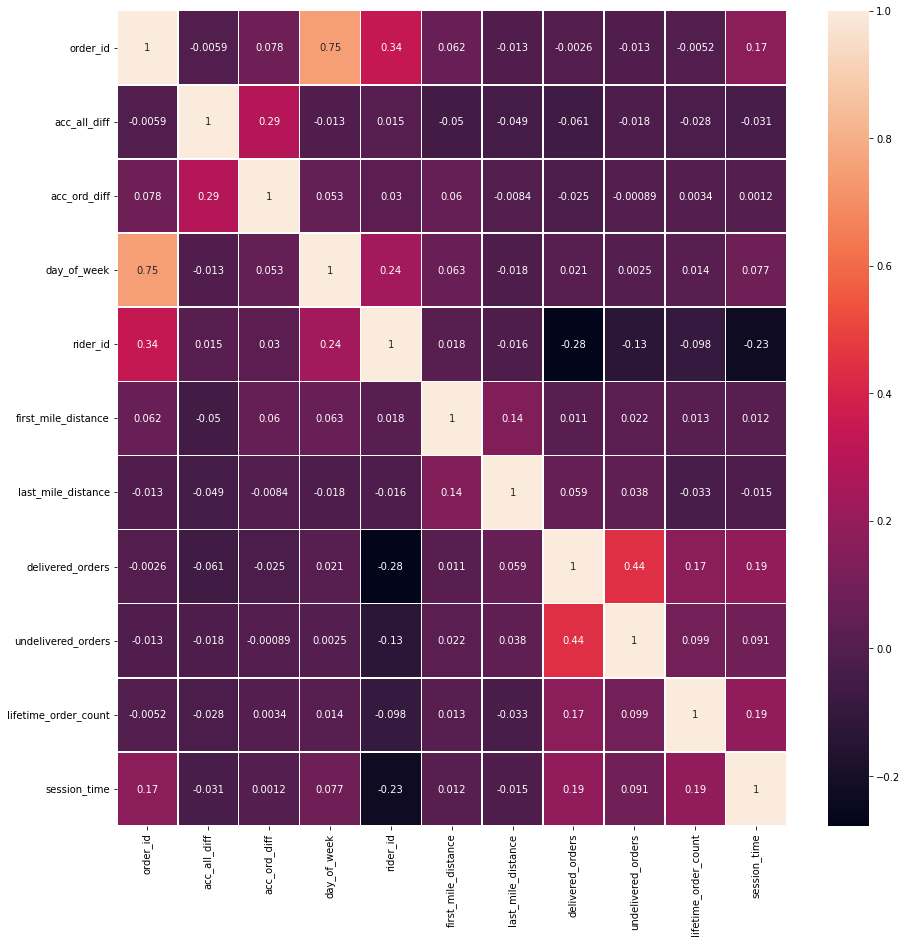

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
ax = sns.heatmap(test.corr().iloc[:, 0:15:], annot=True, linewidths=.5)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X.head()

,acc_all_diff,acc_ord_diff,session,day_of_week,rider_id,first_mile_distance,last_mile_distance,delivered_orders,undelivered_orders,lifetime_order_count,session_time,dist_diff
0,0.968742,0.001988,0.0,0.166667,0.542335,0.037263,0.118251,-1.0,-1.0,-1.0,-1.0,0.080988
1,0.970065,0.005578,0.0,0.166667,0.840072,0.059959,0.123159,-1.0,-1.0,-1.0,-1.0,0.063200
2,0.968979,0.001411,0.0,0.166667,0.863535,0.052506,0.214190,-1.0,-1.0,-1.0,-1.0,0.161684
3,0.969828,0.004552,0.0,0.166667,0.739358,0.052078,0.284694,-1.0,-1.0,-1.0,-1.0,0.232616
4,0.969658,0.005450,0.0,0.166667,0.815589,0.066294,0.178938,-1.0,-1.0,-1.0,-1.0,0.112644


In [ ]:
# X = X.drop('order_id',axis=1)
test = test.drop('order_id',axis=1)

In [ ]:
X['dist_diff'] = X['last_mile_distance'] - X['first_mile_distance']

In [ ]:
test['dist_diff'] = test['last_mile_distance'] - test['first_mile_distance']

In [ ]:
# #Data scaling
# std_scaler = StandardScaler()
# std_scaler.fit(X)
# X_train_std = std_scaler.transform(X)
# X_test_std = std_scaler.transform(test)

# # mm_scaler = MinMaxScaler()
# # mm_scaler.fit(X)
# # X_train_mm = mm_scaler.transform(X)
# # X_test_mm = mm_scaler.transform(test)

In [ ]:
# pd.DataFrame(X_train_std).head()

In [ ]:
print(set(test.columns) - set(X.columns))

set()


In [ ]:
# X = pd.DataFrame(X_train_std)
# test = pd.DataFrame(X_test_std)

Feature engineering performed so far,

1.   Session
2.   Hour of the Day
3.   Acc All Diff
4.   Acc Ord Diff





Logistic,

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X, y)

In [ ]:
y_pred = clf.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0.0    449662
1.0       139
dtype: int64

Weighted Logistic,

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449801 entries, 0 to 449842
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   acc_all_diff          449801 non-null  float64
 1   acc_ord_diff          449801 non-null  float64
 2   session               449801 non-null  float64
 3   day_of_week           449801 non-null  float64
 4   rider_id              449801 non-null  float64
 5   first_mile_distance   449801 non-null  float64
 6   last_mile_distance    449801 non-null  float64
 7   delivered_orders      449801 non-null  float64
 8   undelivered_orders    449801 non-null  float64
 9   lifetime_order_count  449801 non-null  float64
 10  session_time          449801 non-null  float64
 11  dist_diff             449801 non-null  float64
dtypes: float64(12)
memory usage: 44.6 MB


In [ ]:
# define class weights
w = {0:1.055, 1:1.5217}# define model
lg2 = LogisticRegression(random_state=42, class_weight=w)
# fit it
lg2.fit(X,y)

LogisticRegression(class_weight={0: 1.055, 1: 1.5217}, random_state=42)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   acc_all_diff          144844 non-null  float64 
 1   acc_ord_diff          144844 non-null  float64 
 2   session               144844 non-null  category
 3   day_of_week           144844 non-null  int64   
 4   rider_id              144844 non-null  int64   
 5   first_mile_distance   144844 non-null  float64 
 6   last_mile_distance    144844 non-null  float64 
 7   delivered_orders      144844 non-null  float64 
 8   undelivered_orders    144844 non-null  float64 
 9   lifetime_order_count  144844 non-null  float64 
 10  session_time          144844 non-null  float64 
 11  dist_diff             144844 non-null  float64 
dtypes: category(1), float64(9), int64(2)
memory usage: 12.3 MB


In [ ]:
y_pred = lg2.predict(test)# performance

In [ ]:
pd.DataFrame(y_pred).value_counts()

1.0    144844
dtype: int64

LDA,

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA.fit(X,y)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = LDA.predict(test)

In [ ]:
pd.DataFrame(y_pred).value_counts()

1.0    125180
0.0     19664
dtype: int64

QDA,

In [ ]:
QDA = QuadraticDiscriminantAnalysis()

In [ ]:
QDA.fit(X,y)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred = QDA.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0.0    449801
dtype: int64

XGBoost,

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X,y)

XGBClassifier()

In [ ]:
y_pred = xgb.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0.0    449744
1.0        57
dtype: int64

LGBoost,

In [ ]:
w = {0:1.055, 1:1.6716}# define model

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(random_state=42,objective ='binary',class_weight=w)

In [ ]:
clf.fit(X, y)

LGBMClassifier(class_weight={0: 1.055, 1: 1.6716}, objective='binary',
               random_state=42)

In [ ]:
y_pred = clf.predict(test)

In [ ]:
pd.DataFrame(y_pred).value_counts()

1.0    132659
0.0     12185
dtype: int64

Gaussian NB,

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()

In [ ]:
nbmodel.fit(X,y)

GaussianNB()

In [ ]:
y_pred = nbmodel.predict(test)

In [ ]:
pd.DataFrame(y_pred).value_counts()

1.0    144844
dtype: int64

KNN,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knnmodel.fit(X,y)

KNeighborsClassifier()

In [ ]:
y_pred = knnmodel.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0.0    449626
1.0       175
dtype: int64

Trying Neural Networks,

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [ ]:
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

In [ ]:
nnmodel = Sequential()

In [ ]:
nnmodel.add(Dense(hidden_units, input_dim=12, activation=hidden_layer_act))
nnmodel.add(Dense(hidden_units, activation=hidden_layer_act))
nnmodel.add(Dense(1, activation=output_layer_act))

In [ ]:
sgd=tf.keras.optimizers.SGD(lr=learning_rate)
nnmodel.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [ ]:
nnmodel.fit(X, y, epochs=no_epochs, batch_size=len(X)+1,  verbose=2)

Epoch 1/100
1/1 - 3s - loss: 0.4851 - acc: 0.9888 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 1s - loss: 0.4502 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 3/100
1/1 - 1s - loss: 0.4194 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 4/100
1/1 - 1s - loss: 0.3920 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 5/100
1/1 - 1s - loss: 0.3676 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 6/100
1/1 - 1s - loss: 0.3457 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 7/100
1/1 - 1s - loss: 0.3261 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 8/100
1/1 - 1s - loss: 0.3085 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 9/100
1/1 - 1s - loss: 0.2926 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 10/100
1/1 - 1s - loss: 0.2782 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 11/100
1/1 - 1s - loss: 0.2651 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 12/100
1/1 - 1s - loss: 0.2531 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 13/100
1/1 - 1s - loss: 0.2422 - acc: 0.9888 - 1s/epoch - 1s/step
Epoch 14/100
1/1 - 1s - loss: 0.2322 - acc: 0.9888 - 1s/epoch - 1s/step
E

In [ ]:
X.shape

(449801, 12)

In [ ]:
y_pred = nnmodel.predict(X)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0.034991    10
0.041444    10
0.036781    10
0.034554    10
0.036592     9
            ..
0.037424     1
0.037424     1
0.037424     1
0.037424     1
0.055645     1
Length: 276145, dtype: int64

In [ ]:
test2=pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
data_final = test2['order_id']

In [ ]:
data_final

0         130231
1         130232
2         130233
3         130234
4         130235
           ...  
144839     41184
144840     41185
144841     41186
144842     41187
144843     41188
Name: order_id, Length: 144844, dtype: int64

In [ ]:
data_final = pd.concat([data_final, pd.DataFrame(y_pred)], axis=1) #Run model and run this cell to get specific y_pred

In [ ]:
data_final.head()

,order_id,0
0,130231.0,0.043457
1,130232.0,0.044611
2,130233.0,0.045861
3,130234.0,0.046108
4,130235.0,0.045037


In [ ]:
data_final.to_csv('result.csv')